In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
original_df = pd.read_csv("train.csv")
original_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
original_df.shape

(1460, 81)

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
original_df[original_df[["SalePrice", "GrLivArea"]].isna().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


# Problem 1 : Predicting SalePrice using GrLivArea

In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy. 

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.  
b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario. 

Univariate Linear Regression between SalePrice and GrLivArea

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

gr_liv_area = original_df["GrLivArea"].values.reshape(-1, 1)
sale_price = original_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(gr_liv_area, sale_price, test_size=0.20)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

Regression problem: SalesPrice = a x GrLivArea + b

In [7]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  19415.85826677829
Coefficients 	: a =  [106.68537547]


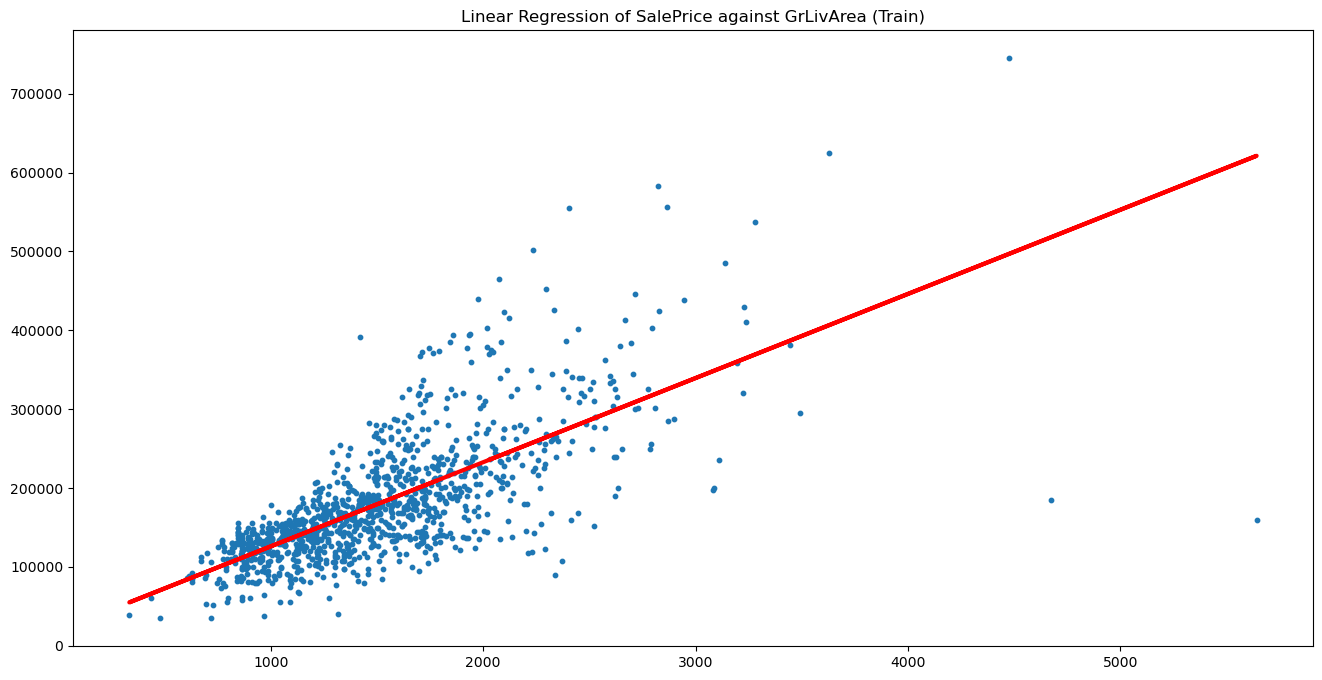

In [8]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train, s=10)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.title("Linear Regression of SalePrice against GrLivArea (Train)")
plt.show()

<font color="red">1a) Regression Plot is shown above</font>

Goodness of Fit on the Train set

In [9]:
y_train_pred = linreg.predict(X_train)


# train data
print("Goodness of Fit of model \t Training Data")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Goodness of Fit of model 	 Training Data
Explained Variance (R^2) 	: 0.501388624219629
Mean Squared Error (MSE) 	: 3104165900.3365583


<font color="red">1b) Goodness of Fit on the Training data is shown above</font>

Prediction Accuracy on the Test set

In [10]:
y_test_pred = linreg.predict(X_test)

# test data
print("Goodness of Fit of model \t Test Data")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Goodness of Fit of model 	 Test Data
Explained Variance (R^2) 	: 0.5040841451893505
Mean Squared Error (MSE) 	: 3282974382.2925262


<font color="red">1b) Prediction Accuracy for the Test Data is shown above</font>

# Problem 2 : Predicting SalePrice using Other Variables 

Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.  

In [11]:
# Regression plot of train data
def plot_regression(X_train, y_train, x_var_name, y_var_name, regline_x, regline_y, axes):
    axes.scatter(X_train, y_train, label="Training Data", s=10)
    axes.plot(regline_x, regline_y, 'r-', linewidth = 3, label=f"Regression Line: {y_var_name} = {linreg.intercept_:.2f} + {linreg.coef_[0]:.2f} * {x_var_name}")
    axes.set_xlabel(f"{x_var_name} (Train)")
    axes.set_ylabel(f"{y_var_name} (Train)")
    axes.set_title(f"Linear Regression: {y_var_name} ↔ {x_var_name} (Train)")

    # equation label
    # x_range = X_train.max() - X_train.min()
    y_range = y_train.max() - y_train.min()
    x_position = X_train.min()
    y_position = y_train.min() + 0.94 * y_range
    equation_text = f"{y_var_name} = \n{linreg.coef_[0]:.2f} * {x_var_name} + {linreg.intercept_:.2f}"
    axes.text(x_position, y_position, equation_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

In [12]:
# Predicted vs True values
def plot_predicted_vs_true(x_var_name, y_var_name, train_r2, train_mse, test_r2, test_mse, axes1, axes2):
    # Train Data
    axes1.scatter(y_train, y_train_pred, s=10)
    axes1.plot(y_train, y_train, 'g-', linewidth = 3)
    axes1.set_xlabel(f"True values of {y_var_name} (Train)")
    axes1.set_ylabel(f"Predicted values of {y_var_name} (Train)")
    axes1.set_title(f"Predicted vs True values: \n{y_var_name} ↔ {x_var_name} (Train)")
    axes1.legend([f"R^2: {train_r2:.2f}\nMSE: {int(train_mse)}"], loc='upper left')

    # Test Data
    axes2.scatter(y_test, y_test_pred, s=10)
    axes2.plot(y_test, y_test, 'g-', linewidth = 3)
    axes2.set_xlabel(f"True values of {y_var_name} (Test)")
    axes2.set_ylabel(f"Predicted values of {y_var_name} (Test)")
    axes2.set_title(f"Predicted vs True values: \n{y_var_name} ↔ {x_var_name} (Test)")
    axes2.legend([f"R^2: {test_r2:.2f}\nMSE: {int(test_mse)}"], loc='upper left')

In [13]:
from math import ceil

ITERATION_COUNT = 50
metric_names = ['COEFFICIENT', 'INTERCEPT', 'TRAIN_R2', 'TRAIN_MSE', 'TEST_R2', 'TEST_MSE']

def compare_variables(df, x_var_names, y_var_name):

    y_var = df[y_var_name]

    all_metrics = {}
    for x_var_name in x_var_names:
        metrics = {metric_name: 0 for metric_name in metric_names}
        all_metrics[x_var_name] = metrics

    num_rows = ceil(len(x_var_names))
    fig, axes = plt.subplots(num_rows, 3, figsize=(21, 7*num_rows))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for iteration in range(ITERATION_COUNT):

        for i, x_var_name in enumerate(x_var_names):

            x_var = df[x_var_name].values.reshape(-1, 1)

            X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.20)

            linreg = LinearRegression()
            linreg.fit(X_train, y_train)

            all_metrics[x_var_name]["COEFFICIENT"] += linreg.coef_[0]
            all_metrics[x_var_name]["INTERCEPT"] += linreg.intercept_

            regline_x = X_train
            regline_y = linreg.intercept_ + linreg.coef_ * X_train

            # Predict SalePrice corresponding to the other variable
            y_train_pred = linreg.predict(X_train)
            y_test_pred = linreg.predict(X_test)

            # Check metrics for train and test
            train_r2 = linreg.score(X_train, y_train)
            train_mse = mean_squared_error(y_train, y_train_pred)
            all_metrics[x_var_name]["TRAIN_R2"] += train_r2
            all_metrics[x_var_name]["TRAIN_MSE"] += train_mse

            test_r2 = linreg.score(X_test, y_test)
            test_mse = mean_squared_error(y_test, y_test_pred)
            all_metrics[x_var_name]["TEST_R2"] += test_r2
            all_metrics[x_var_name]["TEST_MSE"] += test_mse


            if iteration == ITERATION_COUNT - 1:
                axes0 = axes[0] if num_rows == 1 else axes[i, 0]
                axes1 = axes[1] if num_rows == 1 else axes[i, 1]
                axes2 = axes[2] if num_rows == 1 else axes[i, 2]
                plot_regression(X_train, y_train, x_var_name, y_var_name, regline_x, regline_y, axes0)
                plot_predicted_vs_true(x_var_name, y_var_name, train_r2, train_mse, test_r2, test_mse, axes1, axes2)
    
    print(f"AVERAGE VALUES AFTER {ITERATION_COUNT} ITERATIONS")
    print("===============================")
    for key, metrics in all_metrics.items():
        print(f"Goodness of Fit for {key}")
        for metric, value in metrics.items():
            all_metrics[key][metric] /= ITERATION_COUNT
            print(f"{metric} \t: {(value / ITERATION_COUNT):.5f}")
        print("===============================")

    plt.show()
    return all_metrics

AVERAGE VALUES AFTER 50 ITERATIONS
Goodness of Fit for GrLivArea
COEFFICIENT 	: 106.79904
INTERCEPT 	: 18930.82138
TRAIN_R2 	: 0.50091
TRAIN_MSE 	: 3124800657.63190
TEST_R2 	: 0.49500
TEST_MSE 	: 3220001210.90813
Goodness of Fit for TotalBsmtSF
COEFFICIENT 	: 110.19965
INTERCEPT 	: 64525.51909
TRAIN_R2 	: 0.37265
TRAIN_MSE 	: 3954958636.54337
TEST_R2 	: 0.37958
TEST_MSE 	: 3875949364.87015
Goodness of Fit for GarageArea
COEFFICIENT 	: 232.92656
INTERCEPT 	: 70831.34846
TRAIN_R2 	: 0.38935
TRAIN_MSE 	: 3879914995.27000
TEST_R2 	: 0.38146
TEST_MSE 	: 3770032914.02020


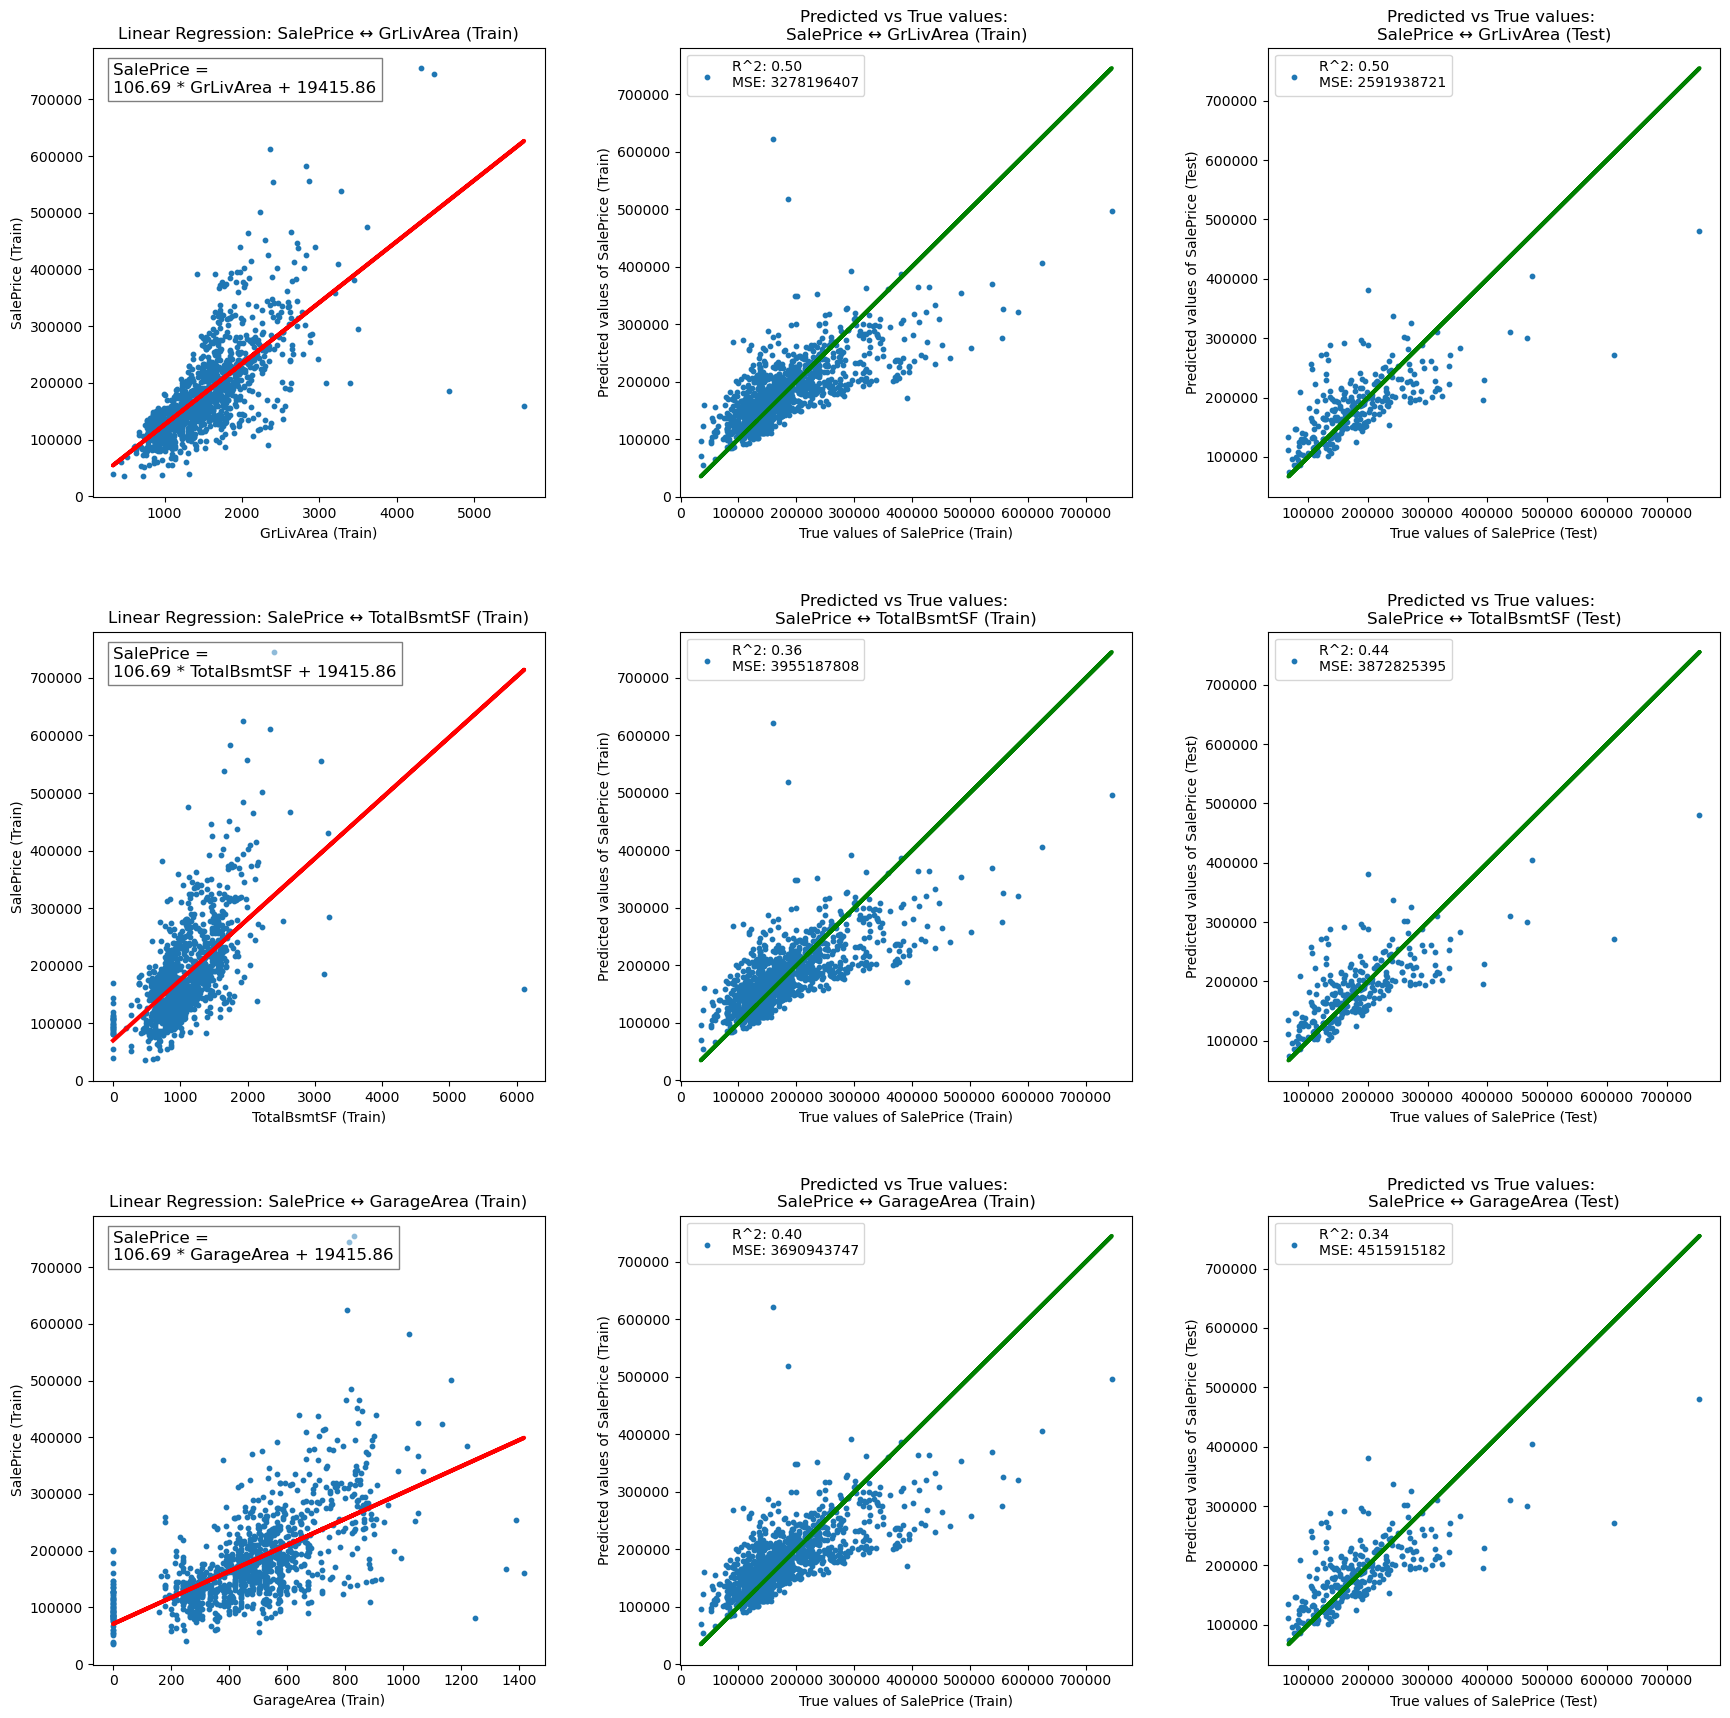

In [14]:
all_metrics = compare_variables(original_df, ["GrLivArea", "TotalBsmtSF", "GarageArea"], "SalePrice")

<font color="red">2): The above shows, for each of the 3 variables:</font>

<ul style="color: red;">
  <li>the Linear Regression</li>
  <li>the predicted vs true values for Training Data</li>
  <li>the predicted vs true values for Test Data</li>
  <li>the metrics R<sup>2</sup> and MSE</li>
</ul>

<font color="red">Next, we will determine the best model</font>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Import Seaborn
from math import ceil

def show_metrics(all_metrics, variables_filter=None):

    if variables_filter:
        all_metrics = {variable: all_metrics[variable] for variable in variables_filter if variable in all_metrics}

    sns.set_theme(style="whitegrid")  # Set the Seaborn style

    relevant_metric_names = ['TRAIN_R2', 'TRAIN_MSE', 'TEST_R2', 'TEST_MSE']
    variables = list(all_metrics.keys())

    # Calculate the number of rows needed for subplots based on the metrics
    num_rows = 2
    num_cols = ceil(len(relevant_metric_names) / 2)

    # Create subplots without sharing y-axis
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))

    for i, metric in enumerate(relevant_metric_names):
        ax = axs[i // num_cols, i % num_cols]  # Locate the right subplot
        data_to_plot = []  # Prepare data for seaborn
        for variable in variables:
            value = all_metrics[variable][metric]
            data_to_plot.append((variable, value))
        
        # Convert data to a format suitable for Seaborn
        df = pd.DataFrame(data_to_plot, columns=['Variable', 'Value'])
        
        # Use Seaborn to plot
        sns.barplot(x='Variable', y='Value', data=df, ax=ax, palette='coolwarm', hue="Variable")

        ax.set_xticks(range(len(df['Variable'])))
        ax.set_xticklabels(ax.get_xticklabels(), ha="center", fontsize=12) 
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(metric)

    plt.tight_layout()
    plt.show()

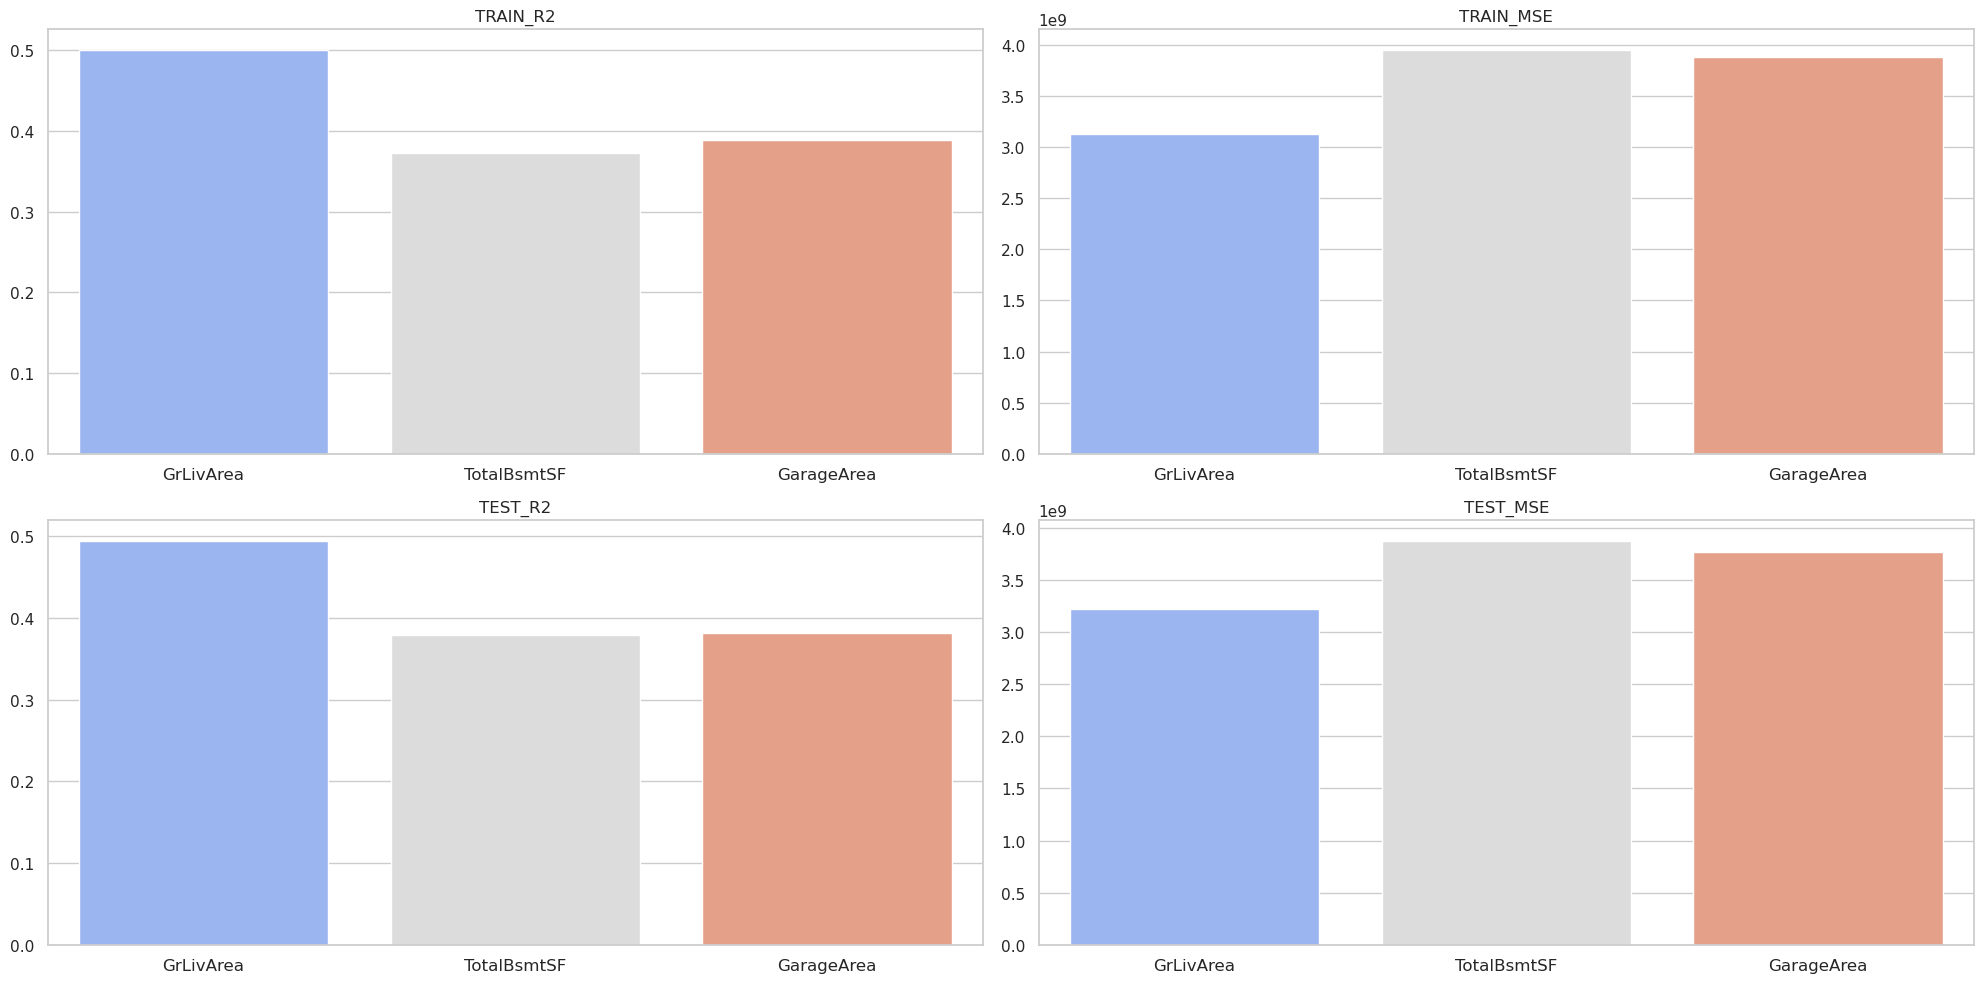

In [16]:
show_metrics(all_metrics)

<font color="red">After 50 Iterations, GrLivArea seems to provide the best model as the Explained Variance R<sup>2</sup> is the largest and Mean Squared Error is the lowest</font>

# Problem 3 : Refining the Models to Predict SalePrice 

In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice. 

(a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.  
(b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.  
(c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify. 

In [17]:
filtered_df = original_df.loc[:,['GrLivArea', 'SalePrice']].copy()
filtered_df

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


In [18]:
filtered_df.shape

(1460, 2)

In [19]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


<Axes: xlabel='SalePrice'>

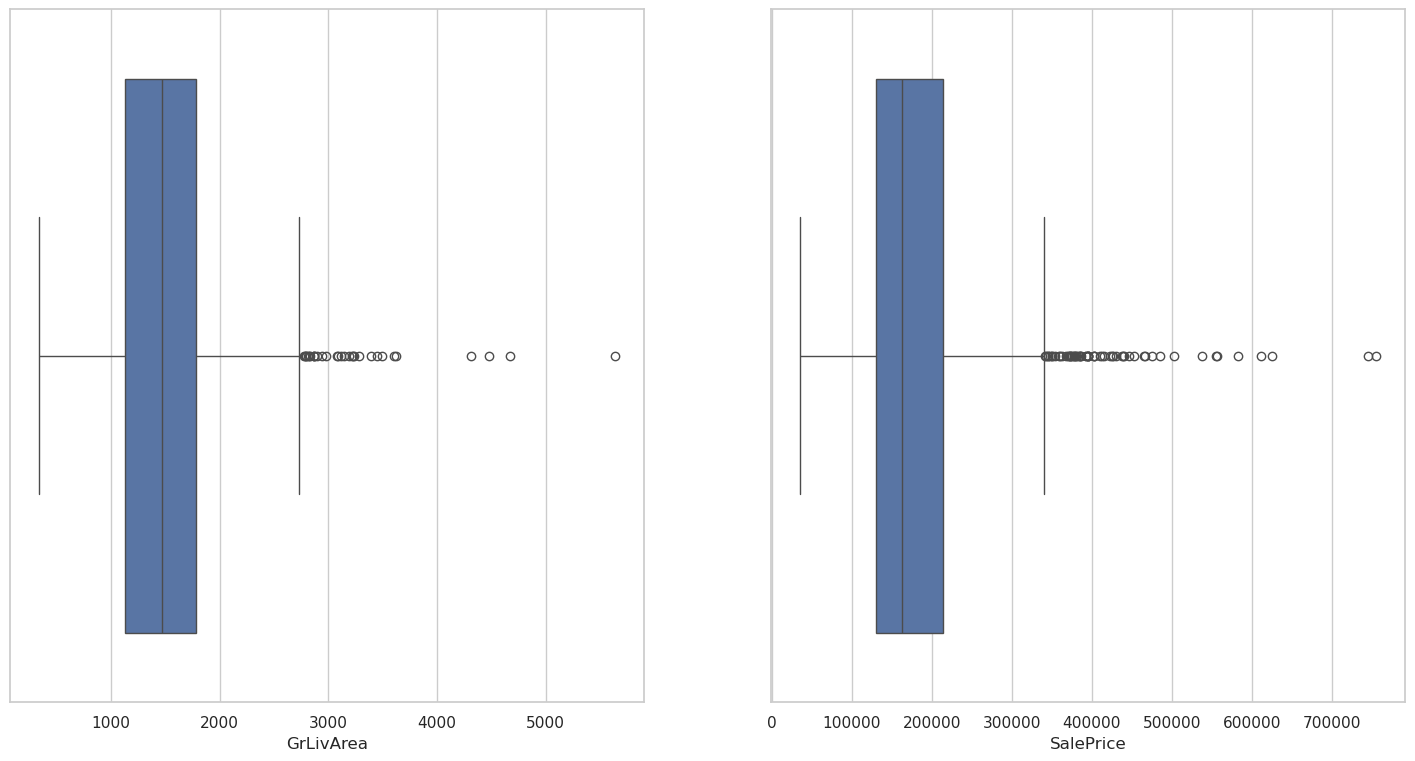

In [20]:
f, axes = plt.subplots(1, 2, figsize=(18, 9))
sns.boxplot(data = filtered_df['GrLivArea'], orient = "h", ax = axes[0])
sns.boxplot(data = filtered_df['SalePrice'], orient = "h", ax = axes[1])

In [21]:
def get_bounds(colName):
    Q1 = filtered_df[colName].quantile(0.25)
    Q3 = filtered_df[colName].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

x_lower_bound, x_upper_bound = get_bounds("GrLivArea")
y_lower_bound, y_upper_bound = get_bounds("SalePrice")

In [22]:
mask = (filtered_df.GrLivArea.between(x_lower_bound, x_upper_bound) & filtered_df.SalePrice.between(y_lower_bound, y_upper_bound))
outliers_df = filtered_df.loc[~mask]
outliers_df

,GrLivArea,SalePrice
11,2324,345000
53,1842,385000
58,2945,438780
112,2696,383970
118,3222,320000
...,...,...
1353,3238,410000
1373,2633,466500
1386,2784,250000
1388,1746,377500


In [23]:
final_df = filtered_df.loc[mask].copy()
final_df.rename(columns={"GrLivArea":"GrLivAreaFiltered"}, inplace=True)
final_df

,GrLivAreaFiltered,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


<font color="red">3a): The above shows removing the outliers outside of the inner lower and inner upper fence</font>

AVERAGE VALUES AFTER 50 ITERATIONS
Goodness of Fit for GrLivAreaFiltered
COEFFICIENT 	: 93.16973
INTERCEPT 	: 33830.51179
TRAIN_R2 	: 0.47503
TRAIN_MSE 	: 1798183350.06638
TEST_R2 	: 0.48151
TEST_MSE 	: 1807923502.98556


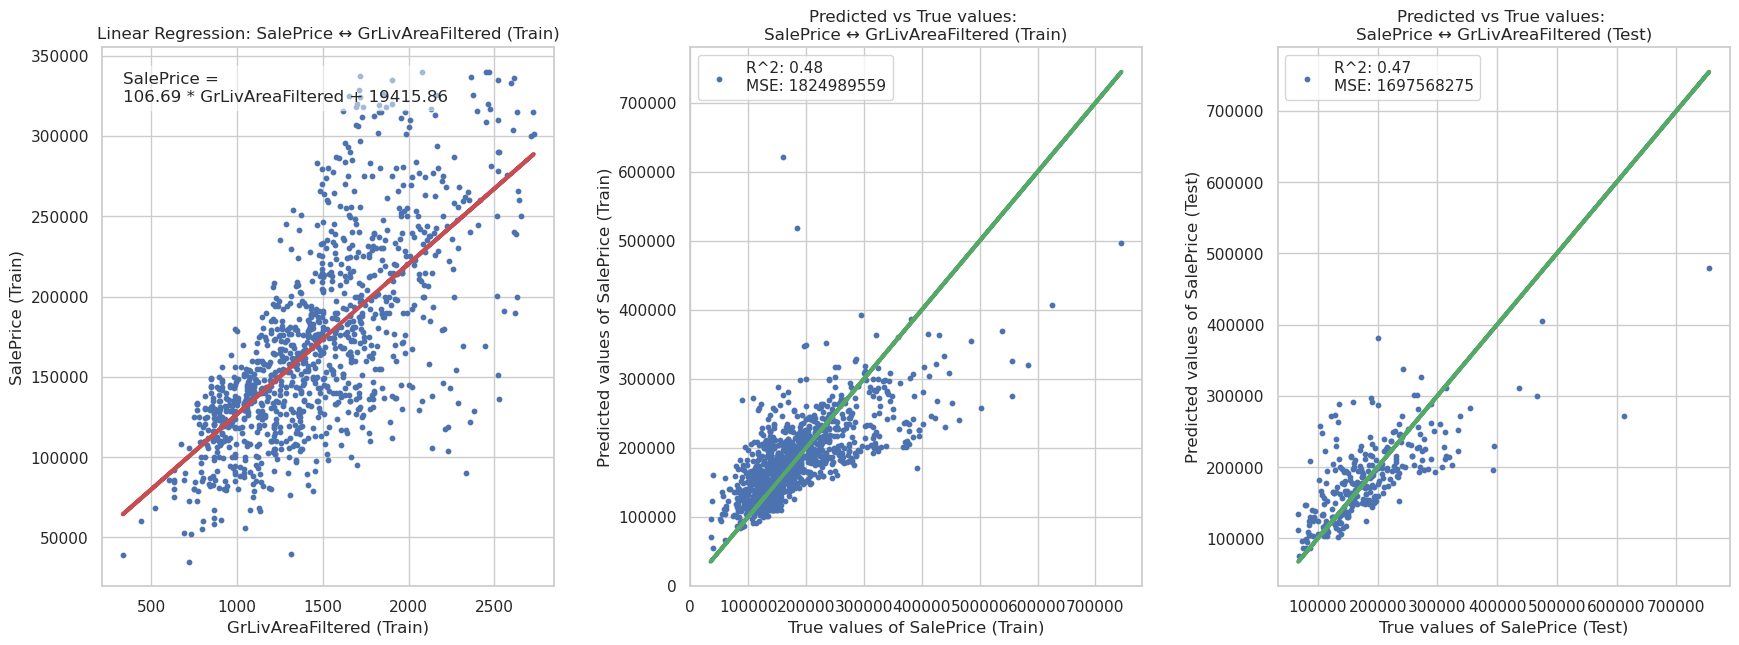

In [24]:
filtered_metrics = compare_variables(final_df, ["GrLivAreaFiltered"], "SalePrice")

<font color="red">3b): The above shows, for the filtered GrLivArea:</font>

<ul style="color: red;">
  <li>the Linear Regression</li>
  <li>the predicted vs true values for Training Data</li>
  <li>the predicted vs true values for Test Data</li>
  <li>the metrics R<sup>2</sup> and MSE (which represent the Goodness of Fit for the Training Data and Prediction Accuracy for the Test Data)</li>
</ul>

<font color="red">Next, we will compare if it is better than previously</font>

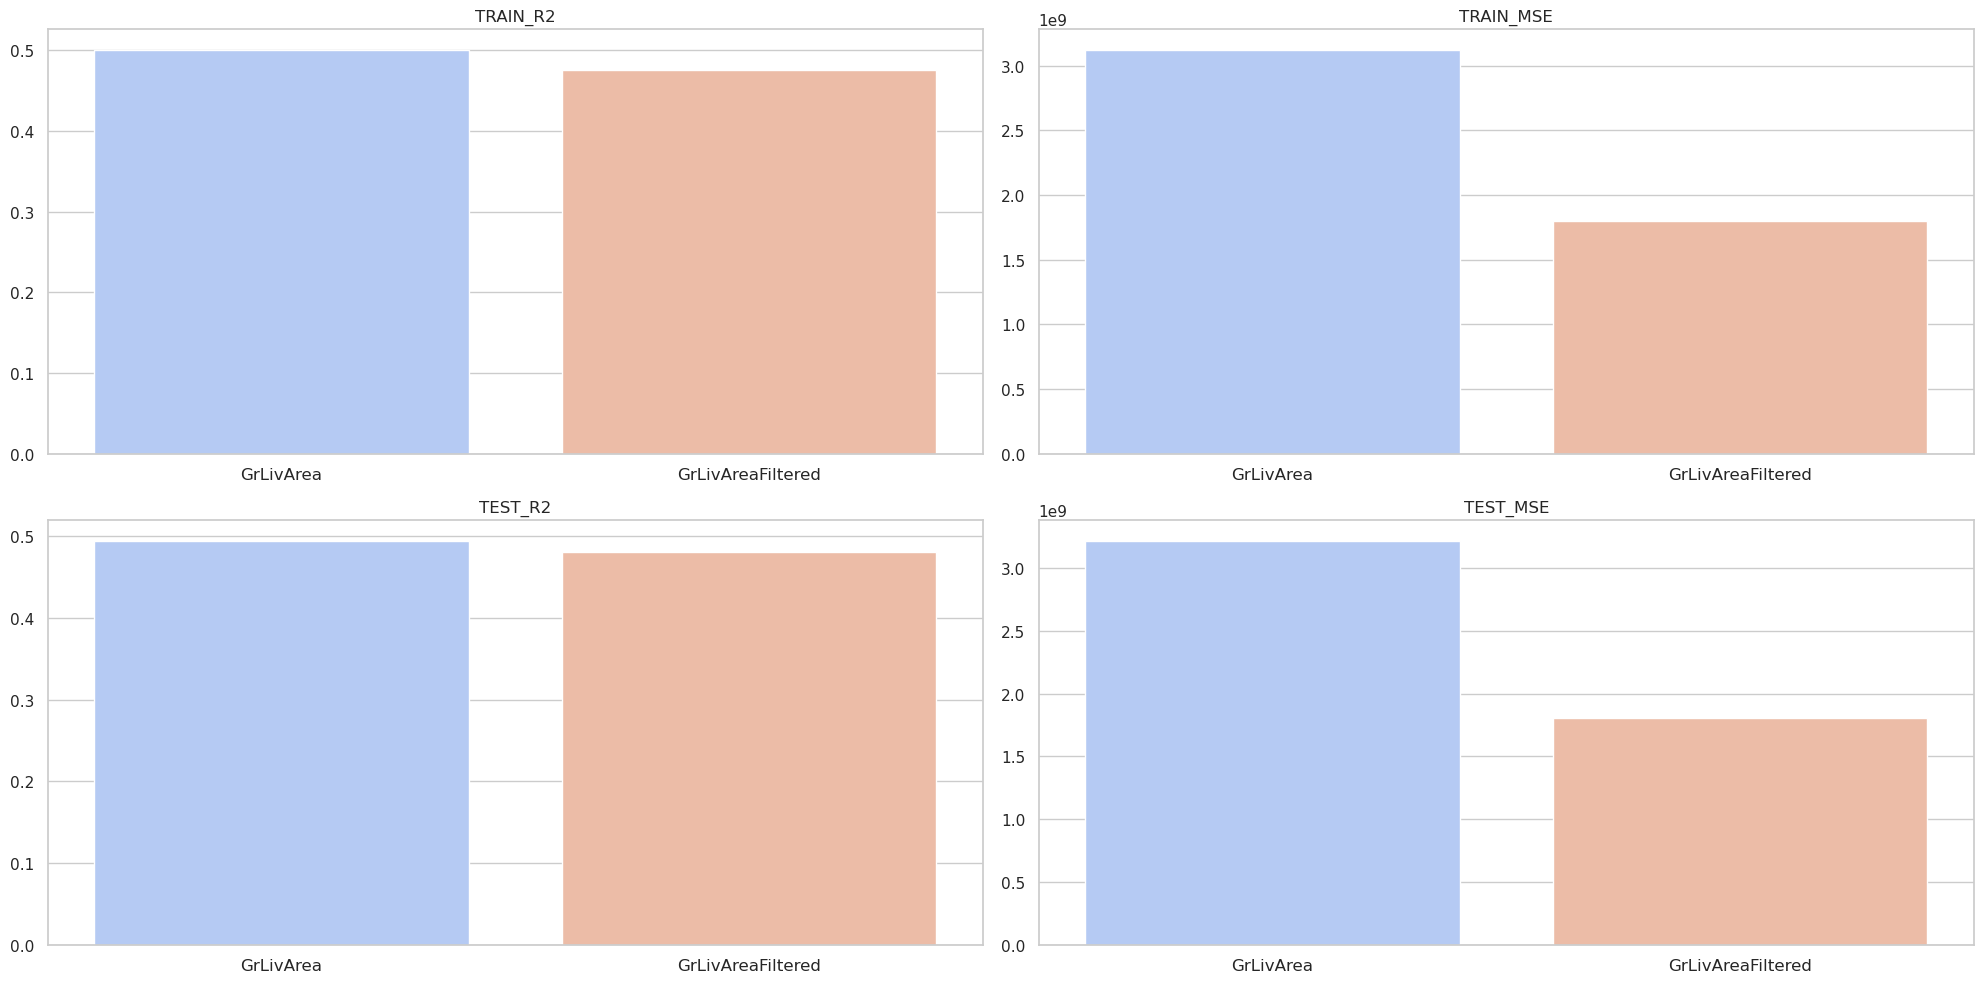

In [25]:
show_metrics({**all_metrics, **filtered_metrics}, variables_filter=["GrLivArea", "GrLivAreaFiltered"])

<font color="red">3b): The above shows the metrics comparison between the filtered GrLivArea and original GrLivArea. Based on 50 iterations, the R<sup>2</sup> value does not change significantly, but there is a large drop in the MSE, so this model is better than the model in Problem 1</font>